In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


In [40]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


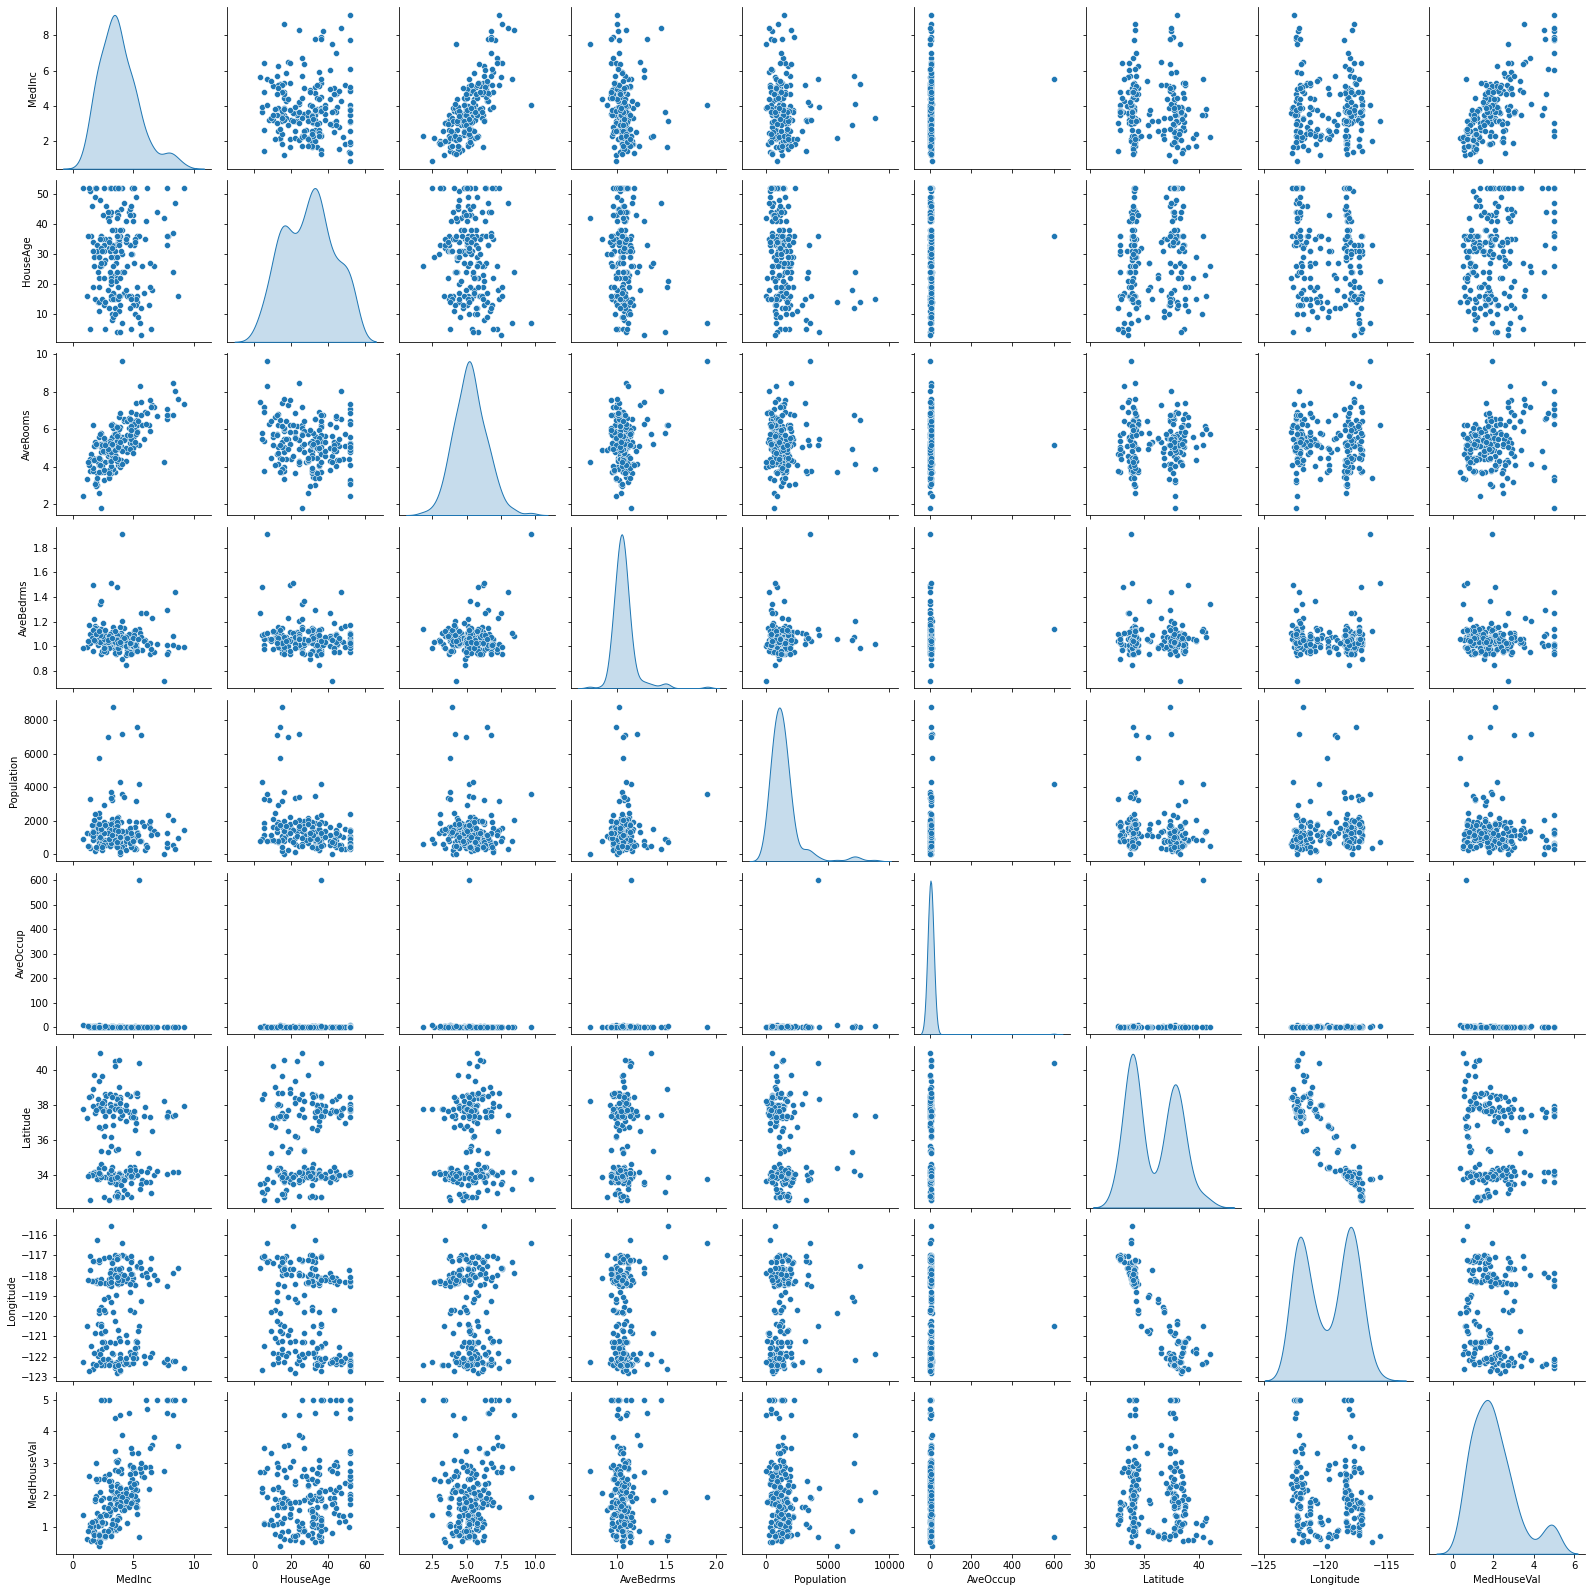

In [41]:
df.info()
df.describe()
sns.pairplot(df.sample(200), diag_kind='kde')  # reduce sample for speed
plt.show()

In [42]:
X = df.drop(columns=['MedHouseVal'])  # feature matrix
y = df['MedHouseVal']                # target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)///

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [45]:
y_pred = pipe.predict(X_test)

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}, R²: {r2:.3f}")

RMSE: 0.746, R²: 0.576


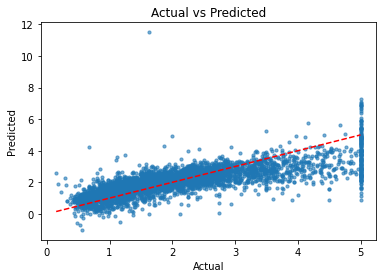

In [47]:
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Sample predictions

In [51]:

# Predict on test data
y_pred = model.predict(X_test)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Value ($)': y_test.values * 100000,      # converting to dollars
    'Predicted Value ($)': y_pred * 100000           # converting to dollars
})

# Show first 10 predictions
comparison_df.head(10)


,Actual Value ($),Predicted Value ($)
0,47700.0,71912.284160
1,45800.0,176401.657066
2,500001.0,270965.883343
3,218600.0,283892.593018
4,278000.0,260465.725181
5,158700.0,201175.367325
6,198200.0,264550.004938
7,157500.0,216875.532129
8,340000.0,274074.644114
9,446600.0,391561.472503


In [53]:
import joblib
joblib.dump(pipe, "model.pkl")

['model.pkl']